In [1]:
# Look at 2017 Spring Bloom in Different Runs

In [2]:
import datetime as dt
from erddapy import ERDDAP
import glob
import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np
import pandas as pd
from pathlib import Path
import xarray as xr

from salishsea_tools import places

%matplotlib inline

In [3]:
# Observations

In [4]:
server = "https://salishsea.eos.ubc.ca/erddap"

protocol = "tabledap"

dataset_id = "ubcONCTWDP1mV18-01"

response = "nc"

variables = [
    "latitude",
    "longitude",
    "chlorophyll",
    "time",
]

fourkmlat = 4/110.574
fourkmlon = 4/(111.320*np.cos(50*np.pi/180.))
lon, lat = places.PLACES['S3']['lon lat']

In [5]:
constraints = {
    "time>=": "2017-02-01T00:00:00Z",
    "time<=": "2017-05-01T00:00:00Z",
    "latitude>=": lat - fourkmlat,
    "latitude<=": lat + fourkmlat,
    "longitude>=": lon - fourkmlon,
    "longitude<=": lon + fourkmlon,
}
obs = ERDDAP(server=server, protocol=protocol,)

obs.dataset_id = dataset_id
obs.variables = variables
obs.constraints = constraints

In [6]:
obs_pd = obs.to_pandas(index_col="time (UTC)", parse_dates=True,).dropna()

In [7]:
# Plotting

In [8]:
def model_obs_comparison(timeseries, obs_pd, ax, title='Model/Obs Comp', N2Chl=2.5):
    obs_pd['chlorophyll (ug/l)'].plot(ax=ax, marker='o', color='green', linewidth=0);
    for i in range(timeseries.x.shape[0]):
        for j in range(timeseries.y.shape[0]):
            ((timeseries.diatoms+timeseries.flagellates+timeseries.ciliates)[:, j, i]*N2Chl).plot(ax=ax, color='purple', 
                                                                                                              marker='.', alpha=0.5, linewidth=0);
    ax.set_title(title)

In [9]:
# Results Set up

In [10]:
year = 2017
months_regex = '0[234]'
file_pattern = f"SalishSea_1d_{year}*ptrc_T*{year}{months_regex}??.nc"
# timeseries = prep_timeseries(dir_path, file_pattern, -1)

In [11]:
def prep_timeseries(dir_path, file_pattern, n_days): 
    ds_files = sorted(dir_path.glob(file_pattern))
    ds = xr.open_mfdataset(
        ds_files[:n_days],
        chunks=chunks,
        drop_variables=drop_vars,
    )
    S3y, S3x = places.PLACES['S3']['NEMO grid ji'][0], places.PLACES['S3']['NEMO grid ji'][1]
    fourkm = 8
    timeseries = ds.isel(deptht = 1, y = slice(S3y-fourkm, S3y+fourkm+1), 
                             x =  slice(S3x-fourkm, S3x+fourkm+1))
    
    return timeseries

In [12]:
drop_vars = [
    "time_centered",
    "time_centered_bounds",
    "time_counter_bounds",
    "nav_lat",
    "bounds_lat",
    "nav_lon",
    "bounds_lon",
    "area",
    "deptht_bounds",
]
chunks = {
    "time_counter": 1,
    "deptht": 1,
}

In [13]:
# 201812
file_pattern2 = f"*/SalishSea_1d_{year}{months_regex}*ptrc_T.nc"
dir_path = Path(f"/results/SalishSea/nowcast-green.201812/")
print (file_pattern2)
! ls /results/SalishSea/nowcast-green.201812/*/SalishSea_1d_20170[234]*ptrc_T.nc | wc
ts_h18 = prep_timeseries(dir_path, file_pattern2, -1)

*/SalishSea_1d_20170[234]*ptrc_T.nc
     89      89    7921


In [14]:
ts_h18.load(scheduler='processes', num_workers=4);

In [15]:
# 202007C-p3

In [16]:
directory = '202007C-p3'
dir_path = Path(f"/data/sallen/results/MEOPAR/202007/{directory}")
ts_Cp3 = prep_timeseries(dir_path, file_pattern, -1)

In [17]:
ts_Cp3.load(scheduler='processes', num_workers=4);

In [18]:
# 202007G-p2

In [19]:
directory = '202007G-p2'
dir_path = Path(f"/data/sallen/results/MEOPAR/202007/{directory}")
ts_Gp2 = prep_timeseries(dir_path, file_pattern, -1)

In [20]:
ts_Gp2.load(scheduler='processes', num_workers=4);

In [21]:
# 202007K

In [22]:
directory = '202007K'
dir_path = Path(f"/data/sallen/results/MEOPAR/202007/{directory}")
ts_K = prep_timeseries(dir_path, file_pattern, -1)

In [23]:
ts_K.load(scheduler='processes', num_workers=4);

In [24]:
# 202007L-1

In [25]:
directory = '202007L-1'
dir_path = Path(f"/data/sallen/results/MEOPAR/202007/{directory}")
ts_L1 = prep_timeseries(dir_path, file_pattern, -1)

In [26]:
ts_L1.load(scheduler='processes', num_workers=4);

In [27]:
# 202007L-2

In [28]:
directory = '202007L-2'
dir_path = Path(f"/data/sallen/results/MEOPAR/202007/{directory}")
file_pattern2 = f"SalishSea_1d_*ptrc_T*{year}{months_regex}??.nc"
ts_L2 = prep_timeseries(dir_path, file_pattern2, -1)

In [29]:
ts_L2.load(scheduler='processes', num_workers=4);

In [30]:
# 202007L-3

In [31]:
directory = '202007L-3'
dir_path = Path(f"/data/sallen/results/MEOPAR/202007/{directory}")
file_pattern2 = f"SalishSea_1d_*ptrc_T*{year}{months_regex}??.nc"
ts_L3 = prep_timeseries(dir_path, file_pattern2, -1)

In [32]:
ts_L3.load(scheduler='processes', num_workers=4);

In [33]:
# Plotting

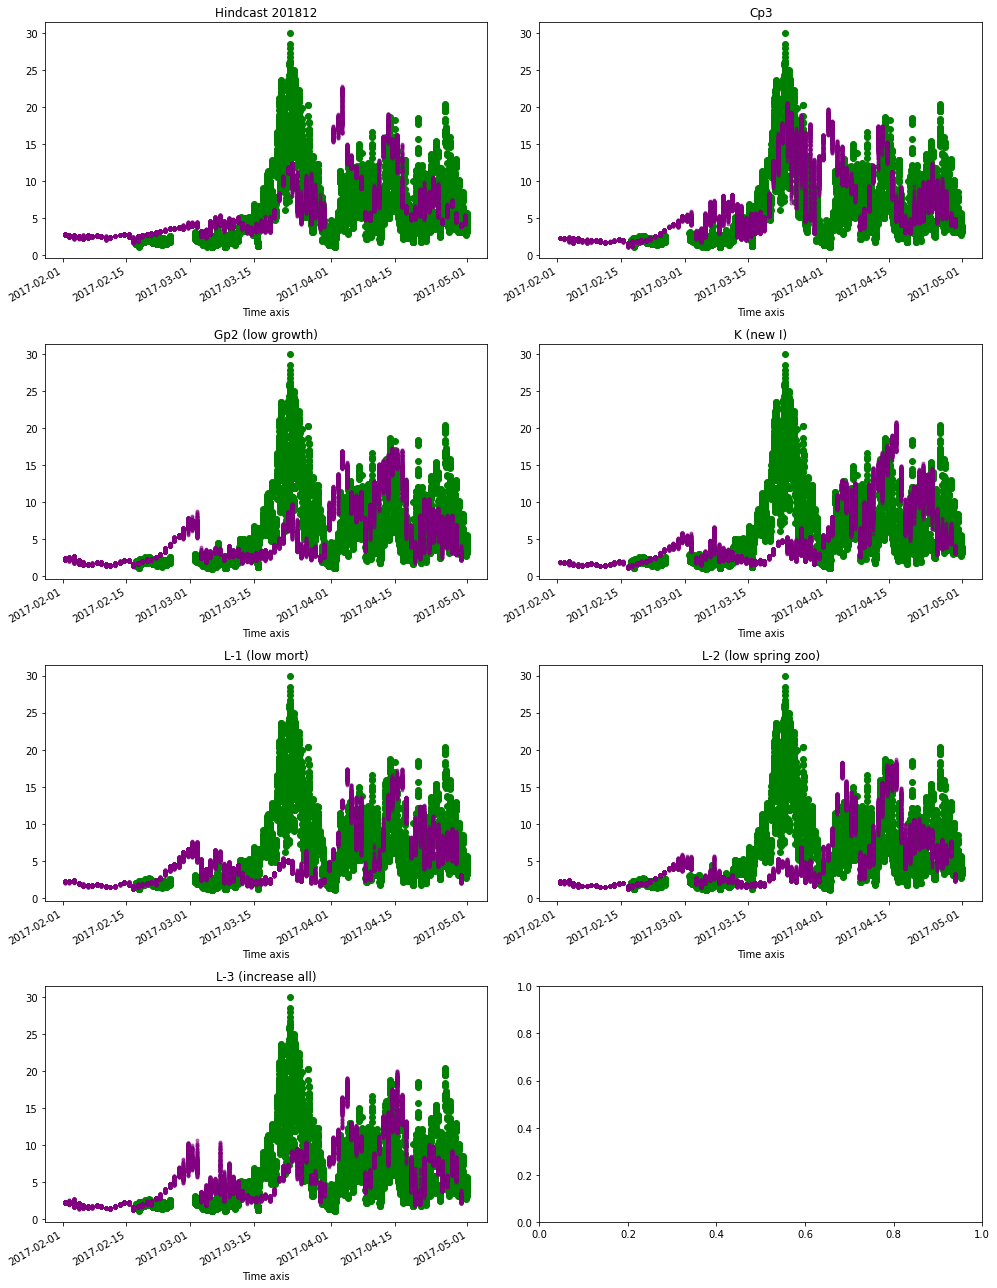

In [34]:
fig, axs = plt.subplots(4, 2, figsize=(14, 18))
model_obs_comparison(ts_h18, obs_pd, axs[0, 0], title='Hindcast 201812')
model_obs_comparison(ts_Cp3, obs_pd, axs[0, 1], title='Cp3')
model_obs_comparison(ts_Gp2, obs_pd, axs[1, 0], title='Gp2 (low growth)')
model_obs_comparison(ts_K, obs_pd, axs[1, 1], title='K (new I)')
model_obs_comparison(ts_L1, obs_pd, axs[2, 0], title='L-1 (low mort)')
model_obs_comparison(ts_L2, obs_pd, axs[2, 1], title='L-2 (low spring zoo)')
model_obs_comparison(ts_L3, obs_pd, axs[3, 0], title='L-3 (increase all)')
fig.tight_layout()

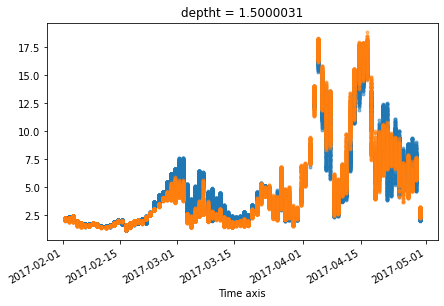

In [35]:
fig, ax = plt.subplots(1, 1, figsize=(7, 4))
N2Chl = 2.5
timeseries = ts_L1
for i in range(timeseries.x.shape[0]):
    for j in range(timeseries.y.shape[0]):
        ((timeseries.diatoms+timeseries.flagellates+timeseries.ciliates)[:, j, i]*N2Chl).plot(ax=ax, marker='.', color='tab:blue', alpha=0.5, linewidth=0);
timeseries = ts_L2
for i in range(timeseries.x.shape[0]):
    for j in range(timeseries.y.shape[0]):
        ((timeseries.diatoms+timeseries.flagellates+timeseries.ciliates)[:, j, i]*N2Chl).plot(ax=ax, marker='.', color='tab:orange', alpha=0.5, linewidth=0);